In [1]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
from datetime import date
from dateutil.relativedelta import relativedelta
import math
from scipy import stats
import time
from tqdm import tqdm
from itertools import product
import multiprocessing
import sys

In [2]:
####################  1. Regression with Daily Return   ###################################

### data

In [3]:
#pf_size = pd.read_csv('C:/Users/yz2991/Desktop/Portfolios_Formed_on_ME_daily.csv')
#ff5 = pd.read_csv('C:/Users/yz2991/Desktop/F-F_Research_Data_5_Factors_2x3_daily.csv')
pf_size = pd.read_csv('data/Portfolios_Formed_on_ME_daily.csv')
ff5 = pd.read_csv('data/F-F_Research_Data_5_Factors_2x3_daily.csv')

In [4]:
pf_size.head()

,Unnamed: 0,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
0,19630701.0,-99.99,-0.58,-0.54,-0.67,-0.61,-0.69,-0.47,-0.56,-0.68,-0.64,-0.58,-0.54,-0.81,-0.55,-0.41,-0.52,-0.59,-0.69,-0.68
1,19630702.0,-99.99,0.44,0.59,0.85,0.50,0.62,0.54,0.72,0.85,0.38,0.62,0.33,0.86,0.50,0.56,0.55,0.82,0.65,0.89
2,19630703.0,-99.99,0.55,0.58,0.65,0.52,0.57,0.62,0.62,0.65,0.41,0.63,0.61,0.54,0.40,0.78,0.56,0.66,0.63,0.65
3,19630705.0,-99.99,0.33,0.34,0.43,0.41,0.29,0.37,0.29,0.44,0.36,0.48,0.18,0.39,0.41,0.34,0.29,0.29,0.31,0.47
4,19630708.0,-99.99,-0.43,-0.53,-0.63,-0.35,-0.74,-0.62,-0.36,-0.66,-0.47,-0.22,-0.58,-0.86,-0.64,-0.60,-0.30,-0.39,-0.47,-0.70


In [5]:
ff5.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.00,-0.32,-0.01,0.15,0.012
1,19630702,0.79,-0.27,0.27,-0.07,-0.19,0.012
2,19630703,0.63,-0.17,-0.09,0.17,-0.33,0.012
3,19630705,0.40,0.08,-0.28,0.08,-0.33,0.012
4,19630708,-0.63,0.04,-0.18,-0.29,0.13,0.012


In [6]:
pf_size.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [7]:
pf_size_excess=(pf_size.iloc[:,1:pf_size.shape[1]]).sub(ff5.RF,axis=0)
print(pf_size_excess.head())

      <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
0 -100.002 -0.592  -0.552 -0.682 -0.622 -0.702 -0.482 -0.572 -0.692 -0.652   
1 -100.002  0.428   0.578  0.838  0.488  0.608  0.528  0.708  0.838  0.368   
2 -100.002  0.538   0.568  0.638  0.508  0.558  0.608  0.608  0.638  0.398   
3 -100.002  0.318   0.328  0.418  0.398  0.278  0.358  0.278  0.428  0.348   
4 -100.002 -0.442  -0.542 -0.642 -0.362 -0.752 -0.632 -0.372 -0.672 -0.482   

   2-Dec  3-Dec  4-Dec  5-Dec  6-Dec  7-Dec  8-Dec  9-Dec  Hi 10  
0 -0.592 -0.552 -0.822 -0.562 -0.422 -0.532 -0.602 -0.702 -0.692  
1  0.608  0.318  0.848  0.488  0.548  0.538  0.808  0.638  0.878  
2  0.618  0.598  0.528  0.388  0.768  0.548  0.648  0.618  0.638  
3  0.468  0.168  0.378  0.398  0.328  0.278  0.278  0.298  0.458  
4 -0.232 -0.592 -0.872 -0.652 -0.612 -0.312 -0.402 -0.482 -0.712  


In [8]:
ff5['YYMM'] = pd.to_datetime(ff5['YYMM'],yearfirst=True, format='%Y%m%d')
pf_size_excess['YYMM'] = pd.to_datetime(pf_size['YYMM'],yearfirst=True, format='%Y%m%d')
print(pf_size_excess.head())

      <= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
0 -100.002 -0.592  -0.552 -0.682 -0.622 -0.702 -0.482 -0.572 -0.692 -0.652   
1 -100.002  0.428   0.578  0.838  0.488  0.608  0.528  0.708  0.838  0.368   
2 -100.002  0.538   0.568  0.638  0.508  0.558  0.608  0.608  0.638  0.398   
3 -100.002  0.318   0.328  0.418  0.398  0.278  0.358  0.278  0.428  0.348   
4 -100.002 -0.442  -0.542 -0.642 -0.362 -0.752 -0.632 -0.372 -0.672 -0.482   

   2-Dec  3-Dec  4-Dec  5-Dec  6-Dec  7-Dec  8-Dec  9-Dec  Hi 10       YYMM  
0 -0.592 -0.552 -0.822 -0.562 -0.422 -0.532 -0.602 -0.702 -0.692 1963-07-01  
1  0.608  0.318  0.848  0.488  0.548  0.538  0.808  0.638  0.878 1963-07-02  
2  0.618  0.598  0.528  0.388  0.768  0.548  0.648  0.618  0.638 1963-07-03  
3  0.468  0.168  0.378  0.398  0.328  0.278  0.278  0.298  0.458 1963-07-05  
4 -0.232 -0.592 -0.872 -0.652 -0.612 -0.312 -0.402 -0.482 -0.712 1963-07-08  


In [9]:
ff5.index = ff5['YYMM']
pf_size_excess.index = pf_size_excess['YYMM']
ff5 = ff5.drop('YYMM', axis = 1)
ff5 = ff5.drop('RF', axis = 1)
# pf_size_excess = pf_size_excess.loc[:,['Lo 30','Med 40','Hi 30']]

In [10]:
print(ff5.head())

            Mkt-RF   SMB   HML   RMW   CMA
YYMM                                      
1963-07-01   -0.67  0.00 -0.32 -0.01  0.15
1963-07-02    0.79 -0.27  0.27 -0.07 -0.19
1963-07-03    0.63 -0.17 -0.09  0.17 -0.33
1963-07-05    0.40  0.08 -0.28  0.08 -0.33
1963-07-08   -0.63  0.04 -0.18 -0.29  0.13


### moving window

In [11]:
start = ff5.index[0]
end = ff5.index[-1]
n_day = end - start

In [12]:
ff5.index[-1]

Timestamp('2019-05-31 00:00:00')

In [13]:
print(n_day.days)
print(ff5.shape)
#because there are weekends and public holidays, we use every 126 records as a proxy of every 6-month window\n",
#There are in total 14075 records, thus will have 14075 - 126 + 1 =  13950 windows\n",
window = 126
n_window = ff5.shape[0] - 126 + 1
print(n_window)

20423
(14075, 5)
13950


In [14]:
#To run OLS on a 6-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 13950 models are for the portfolio Lo 30,\n",
#the next 13950 models are for the portfolio Med 40\n",
pf_3 = pf_size_excess.loc[:,['Lo 30','Med 40','Hi 30']]
pf_3.head()

,Lo 30,Med 40,Hi 30
YYMM,,,
1963-07-01,-0.592,-0.552,-0.682
1963-07-02,0.428,0.578,0.838
1963-07-03,0.538,0.568,0.638
1963-07-05,0.318,0.328,0.418
1963-07-08,-0.442,-0.542,-0.642


In [15]:
pf_size_excess_3_5_10 = pf_size_excess.iloc[:-4,1:-1]

In [46]:
ff5.index

DatetimeIndex(['1963-07-01', '1963-07-02', '1963-07-03', '1963-07-05',
               '1963-07-08', '1963-07-09', '1963-07-10', '1963-07-11',
               '1963-07-12', '1963-07-15',
               ...
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', name='YYMM', length=14075, freq=None)

In [19]:
start_dates = []
targets = list(pf_size_excess_3_5_10.columns)
targets

['Lo 30',
 'Med 40',
 'Hi 30',
 'Lo 20',
 'Qnt 2',
 'Qnt 3',
 'Qnt 4',
 'Hi 20',
 'Lo 10',
 '2-Dec',
 '3-Dec',
 '4-Dec',
 '5-Dec',
 '6-Dec',
 '7-Dec',
 '8-Dec',
 '9-Dec',
 'Hi 10']

In [23]:
def reg_i(startIdx_targets):
    start_idx = startIdx_targets[0]
    target = startIdx_targets[1]
    window_size = 126
    x = ff5.iloc[start_idx: start_idx+window-1, :]
    y = pf_size_excess_3_5_10.iloc[start_idx: start_idx+window-1, :][[target]]
    reg = sm.OLS(y, x)
    return reg.fit()

In [24]:
import multiprocessing
from itertools import product

targets = list(pf_size_excess_3_5_10.columns)
indices = range(n_window-window)
args_ = list(product(indices, targets))
type(args_)

In [26]:
start_ = time.time()
res_dict = {}
with multiprocessing.Pool() as pool:
    for idx, ret in enumerate(pool.imap_unordered(reg_i, args_)):
        res_dict[args_[idx]] = ret
        sys.stderr.write('\rprocessing individual names {0:%}'.format(idx / (len(args_))))
print(time.time() - start_)

processing individual names 99.953382%

255.4633710384369


processing individual names 99.999598%

In [28]:
start_ = time.time()

In [ ]:
res_dict.keys()

In [32]:
print(window)
window_nm = []
for i in range(n_window):
    nm = ff5.index[i+int(window/2)]
    window_nm.append(nm)
print(len(window_nm))
portfolio_nm_3 = pf_size_excess.columns[1:4]
print(portfolio_nm_3)

126
13950
Index(['Lo 30', 'Med 40', 'Hi 30'], dtype='object')


In [35]:
all_keys = res_dict.keys()

In [98]:
Rsquare_3_pf = {}

for target in ['Lo 30', 'Med 40', 'Hi 30']:
    rsquare_dict = {}
    target_keys = sorted([x for x in all_keys if x[1]==target])
    for key_ in target_keys:
        rsquare_dict[ff5.index[key_[0]]] = res_dict[key_].rsquared
    
    df = pd.DataFrame(data = rsquare_dict, index=[0]).T
    df.index.name = 'date'
    df.columns =['rsquared']
    Rsquare_3_pf[target] = df

In [88]:
df = pd.DataFrame(data = rsquare_dict, index=[0]).T

In [94]:
df.index.name = 'date'
df.columns =['rsquared']

In [101]:
Rsquare_5_pf = {}

for target in ['Lo 20',  'Qnt 2',  'Qnt 3',  'Qnt 4', 'Hi 20']:
    rsquare_dict = {}
    target_keys = sorted([x for x in all_keys if x[1]==target])
    for key_ in target_keys:
        rsquare_dict[ff5.index[key_[0]]] = res_dict[key_].rsquared

    
    df = pd.DataFrame(data = rsquare_dict, index=[0]).T
    df.index.name = 'date'
    df.columns =['rsquared']
    Rsquare_5_pf[target] = df

In [102]:
Rsquare_10_pf = {}

for target in ['Lo 10', '2-Dec', '3-Dec', '4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec', '9-Dec', 'Hi 10']:
    rsquare_dict = {}
    target_keys = sorted([x for x in all_keys if x[1]==target])
    for key_ in target_keys:
        rsquare_dict[ff5.index[key_[0]]] = res_dict[key_].rsquared

    
    df = pd.DataFrame(data = rsquare_dict, index=[0]).T
    df.index.name = 'date'
    df.columns =['rsquared']
    Rsquare_10_pf[target] = df

/home/whan/miniconda3/envs/eqai/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


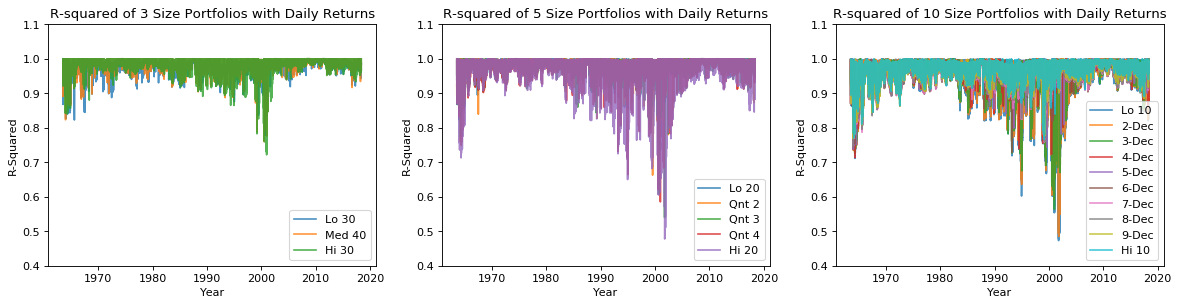

In [104]:
fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
for target in ['Lo 30','Med 40','Hi 30']:
    plt.plot(Rsquare_3_pf[target],label=target,alpha=0.8)

plt.legend(loc='lower right')
plt.ylim([0.4, 1.1])
plt.title('R-squared of 3 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(1, 3, 2)
for target in ['Lo 20',  'Qnt 2',  'Qnt 3',  'Qnt 4', 'Hi 20']:
    plt.plot(Rsquare_5_pf[target],label=target,alpha=0.8)

plt.legend(loc='lower right')
plt.ylim([0.4,1.1])
plt.title('R-squared of 5 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(1, 3, 3)
for target in ['Lo 10', '2-Dec', '3-Dec', '4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec', '9-Dec', 'Hi 10']:
    plt.plot(Rsquare_10_pf[target],label=target,alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.4, 1.1])
plt.title('R-squared of 10 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.show()

In [ ]:
####################  2. Regression with Monthly Return   ###################################

In [ ]:
#pf_size_mm = pd.read_csv('C:/Users/yz2991/Desktop/Portfolios_Formed_on_ME_monthly.csv')
#ff5_mm = pd.read_csv('C:/Users/yz2991/Desktop/F-F_Research_Data_5_Factors_2x3_monthly.csv')

pf_size_mm = pd.read_csv('data/Portfolios_Formed_on_ME_monthly.csv')
ff5_mm = pd.read_csv('data/F-F_Research_Data_5_Factors_2x3_monthly.csv')


In [ ]:
print(pf_size_mm.tail())

In [ ]:
pf_size_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [ ]:
pf_size_excess_mm=(pf_size_mm.iloc[:,1:pf_size_mm.shape[1]]).sub(ff5_mm.RF,axis=0)

In [ ]:
ff5_mm['YYMM'] = pd.to_datetime(ff5_mm['YYMM'],yearfirst=True, format='%Y%m')
pf_size_excess_mm['YYMM'] = pd.to_datetime(pf_size_mm['YYMM'],yearfirst=True, format='%Y%m')

In [ ]:
print(pf_size_excess_mm.tail())

In [ ]:
ff5_mm.index = ff5_mm['YYMM']
pf_size_excess_mm.index = pf_size_excess_mm['YYMM']
ff5_mm = ff5_mm.drop('YYMM', axis = 1)
ff5_mm = ff5_mm.drop('RF', axis = 1)

In [ ]:
#use 10 year window (number of obs will be close to daily models with half-year window)
start_mm = ff5_mm.index[0]
end_mm = ff5_mm.index[ff5_mm.shape[0]-1]
n_month = end_mm - start_mm
print(ff5_mm.shape[0])
window_mm = 120
n_window_mm = ff5_mm.shape[0] - window_mm + 1
print(n_window_mm)
print(end_mm)

In [ ]:
print(window_mm)
window_nm_month = []
for i in range(n_window_mm):
    nm = ff5_mm.index[i+int(window_mm/2)]
    window_nm_month.append(nm)
print(len(window_nm_month))
portfolio_nm_3 = pf_size_excess.columns[1:4]
print(portfolio_nm_3)

In [ ]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_3_mm = pf_size_excess_mm.loc[:,['Lo 30','Med 40','Hi 30']]
models_3_pf_mm = []
for i in range (3):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_3_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_3_pf_mm.append(reg.fit())
    

In [ ]:
Rsquare_3_pf_mm = {}
for i in range(3):
    x = []
    for n in range(n_window_mm):  
        x.append(models_3_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_3_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [ ]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_5_mm = pf_size_excess_mm.loc[:,['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
models_5_pf_mm = []
for i in range (5):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_5_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_5_pf_mm.append(reg.fit())

In [ ]:
Rsquare_5_pf_mm = {}
for i in range(5):
    x = []
    for n in range(n_window_mm):  
        x.append(models_5_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_5_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [ ]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_10_mm = pf_size_excess_mm.loc[:,['Lo 10', '2-Dec', '3-Dec','4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec','9-Dec', 'Hi 10']]
models_10_pf_mm = []
for i in range (10):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_10_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_10_pf_mm.append(reg.fit())

In [ ]:
Rsquare_10_pf_mm = {}
for i in range(10):
    x = []
    for n in range(n_window_mm):  
        x.append(models_10_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_10_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [ ]:
fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(Rsquare_3_pf_mm['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.xlim(["1963","2022"])
plt.title('R-squared of 3 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.plot(Rsquare_5_pf_mm['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.plot(Rsquare_10_pf_mm['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi= 180, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.subplots(2, 3, sharex=True, sharey=True)

plt.subplot(2, 3, 4)
plt.plot(Rsquare_3_pf['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 3 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 5)
plt.plot(Rsquare_5_pf['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 6)
plt.plot(Rsquare_10_pf['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')

plt.subplot(2, 3, 1)
plt.plot(Rsquare_3_pf_mm['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.xlim(["1963","2022"])
plt.title('R-squared of 3 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(2, 3, 2)
plt.plot(Rsquare_5_pf_mm['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 5 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.subplot(2, 3, 3)
plt.plot(Rsquare_10_pf_mm['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('R-squared of 10 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('R-Squared')
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(Rsquare_10_pf_mm['Portfoio0'],label="Lo 10",alpha=0.8)
plt.show()

In [ ]:
####################  3. Factor Correlations with Monthly Return   ###################################

In [ ]:
corr = ff5_mm.corr()

In [ ]:
print(corr)

In [ ]:
corr.iloc[1][4]

Rsquare_5_pf_mm = {}
for i in range(5):
    x = []
    for n in range(n_window_mm):  
        x.append(models_5_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_5_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [ ]:
correlation = []
for m in range(n_window_mm):
    t0 = ff5_mm.index[0+m]
    if ff5_mm.index[0+m+window_mm-1] < end_mm:
        t1 = ff5_mm.index[0+m+window_mm-1]
    else:
        t1 = end_mm
    correlation.append(ff5_mm[t0:t1].corr())        

In [ ]:
print(correlation[1])
correlation[0].iloc[4][1]

In [ ]:
Mrk_SMB = []
Mrk_HML = []
Mrk_RMW = []
Mrk_CMA = []
SMB_HML = []
SMB_RMW = []
SMB_CMA = []
HML_RMW = []
HML_CMA = []
RMW_CMA = []
for i in range(len(correlation)):
    Mrk_SMB.append(correlation[i].iloc[0][1])
    Mrk_HML.append(correlation[i].iloc[0][2])
    Mrk_RMW.append(correlation[i].iloc[0][3])
    Mrk_CMA.append(correlation[i].iloc[0][4])
    SMB_HML.append(correlation[i].iloc[1][2])
    SMB_RMW.append(correlation[i].iloc[1][3])
    SMB_CMA.append(correlation[i].iloc[1][4])
    HML_RMW.append(correlation[i].iloc[2][3])
    HML_CMA.append(correlation[i].iloc[2][4])
    RMW_CMA.append(correlation[i].iloc[3][4])
    
Mrk_SMB_Corr = pd.Series(Mrk_SMB,index = window_nm_month)
Mrk_HML_Corr = pd.Series(Mrk_HML,index = window_nm_month)  
Mrk_RMW_Corr = pd.Series(Mrk_RMW,index = window_nm_month)  
Mrk_CMA_Corr = pd.Series(Mrk_CMA,index = window_nm_month)  
SMB_HML_Corr = pd.Series(SMB_HML,index = window_nm_month)  
SMB_RMW_Corr = pd.Series(SMB_RMW,index = window_nm_month)  
SMB_CMA_Corr = pd.Series(SMB_CMA,index = window_nm_month)  
HML_RMW_Corr = pd.Series(HML_RMW,index = window_nm_month)  
HML_CMA_Corr = pd.Series(HML_CMA,index = window_nm_month)  
RMW_CMA_Corr = pd.Series(RMW_CMA,index = window_nm_month)  

In [ ]:
plt.figure(figsize=(130, 180), dpi= 800, facecolor='w', edgecolor='k')
plt.subplots(4, 4, sharex=True, sharey=True)

plt.subplot(4, 4, 1)
plt.plot(Mrk_SMB_Corr)
plt.title('SMB')
plt.ylabel('Mrk-Rf')

plt.subplot(4, 4, 2)
plt.plot(Mrk_HML_Corr)
plt.title('HML')

plt.subplot(4, 4, 3)
plt.plot(Mrk_RMW_Corr)
plt.title('RMW')

plt.subplot(4, 4, 4)
plt.plot(Mrk_CMA_Corr)
plt.title('CMA')

plt.subplot(4, 4, 6)
plt.plot(SMB_HML_Corr)
plt.ylabel('SMB')

plt.subplot(4, 4, 7)
plt.plot(SMB_RMW_Corr)


plt.subplot(4, 4, 8)
plt.plot(SMB_CMA_Corr)


plt.subplot(4, 4, 11)
plt.plot(HML_RMW_Corr)
plt.ylabel('RMW')

plt.subplot(4, 4, 12)
plt.plot(HML_CMA_Corr)

plt.subplot(4, 4, 16)
plt.plot(RMW_CMA_Corr)
plt.ylabel('CMA')

plt.show()

In [ ]:
fig1 = plt.figure(figsize=(30, 15))

ax1 = fig1.add_subplot(441)
ax1.plot(Mrk_SMB_Corr)
ax1.set_title('SMB')
ax1.set_ylabel('Mrk-Rf')

ax2 = fig1.add_subplot(442)
ax2.plot(Mrk_HML_Corr)
ax2.set_title('HML')
ax2.set_ylabel('Mrk-Rf')



plt.show()

In [ ]:
ax1.plot(Mrk_SMB_Corr)
plt.show()

In [ ]:
plt.subplots(4, 4, sharex=True, sharey=True)

plt.subplot(4, 4, 1)
plt.plot(Mrk_SMB_Corr)
plt.title('SMB')
plt.ylabel('Mrk-Rf')

plt.subplot(4, 4, 2)
plt.plot(Mrk_HML_Corr)
plt.title('HML')

plt.subplot(4, 4, 3)
plt.plot(Mrk_RMW_Corr)
plt.title('RMW')

plt.subplot(4, 4, 4)
plt.plot(Mrk_CMA_Corr)
plt.title('CMA')

plt.subplot(4, 4, 6)
plt.plot(SMB_HML_Corr)
plt.ylabel('SMB')

plt.subplot(4, 4, 7)
plt.plot(SMB_RMW_Corr)


plt.subplot(4, 4, 8)
plt.plot(SMB_CMA_Corr)


plt.subplot(4, 4, 11)
plt.plot(HML_RMW_Corr)
plt.ylabel('RMW')

plt.subplot(4, 4, 12)
plt.plot(HML_CMA_Corr)

plt.subplot(4, 4, 16)
plt.plot(RMW_CMA_Corr)
plt.ylabel('CMA')

plt.show()

In [ ]:
####################  4. Factor Significance in Daily Return ###################################

In [ ]:

lo_30_p = {}
Med_40_p = {}
Hi_30_p = {}

factor = ['Const', 'Mrk-Rf', 'SMB', 'HML', 'RMW', 'CMA']

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf)/3)):            
        x.append(models_3_pf[i].pvalues[j])
    lo_30_p[factor[j]] = pd.Series(x, index = window_nm)

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf)/3)-1, 2*int(len(models_3_pf)/3)-1):            
        x.append(models_3_pf[i].pvalues[j])
    Med_40_p[factor[j]] = pd.Series(x, index=window_nm)
    
for j in range(6):
    x= []
    for i in range(2*int(len(models_3_pf)/3)-1, len(models_3_pf)-1):            
        x.append(models_3_pf[i].pvalues[j])
    Hi_30_p[factor[j]] = pd.Series(x, index = window_nm)

lo_30_p_summary = pd.concat([lo_30_p[factor[1]],lo_30_p[factor[2]],lo_30_p[factor[3]],lo_30_p[factor[4]],lo_30_p[factor[5]]], axis=1)
Med_40_p_summary = pd.concat([Med_40_p[factor[1]],Med_40_p[factor[2]],Med_40_p[factor[3]],Med_40_p[factor[4]],Med_40_p[factor[5]]], axis=1)
Hi_30_p_summary = pd.concat([Hi_30_p[factor[1]],Hi_30_p[factor[2]],Hi_30_p[factor[3]],Hi_30_p[factor[4]],Hi_30_p[factor[5]]], axis=1)


In [ ]:
lo_30_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[0]]
lo_30_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[1]]
lo_30_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[2]]
lo_30_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[3]]
lo_30_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[4]]

Med_40_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[0]]
Med_40_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[1]]
Med_40_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[2]]
Med_40_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[3]]
Med_40_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[4]]

Hi_30_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[0]]
Hi_30_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[1]]
Hi_30_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[2]]
Hi_30_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[3]]
Hi_30_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[4]]


In [ ]:
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots(5, 3, sharex=True, sharey=True)

plt.subplot(5, 3, 1)
plt.plot(lo_30_p_summary['Mrk-Rf Ind'],'o',markersize = 0.5,label="Mrk",alpha=0.8)
plt.title('Lo_30 Portfolio')
plt.ylabel('Mrk-Rf')
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1, step=1))

plt.subplot(5, 3, 2)
plt.plot(Med_40_p_summary['Mrk-Rf Ind'],'o',markersize = 0.5, label="Mrk",alpha=0.8)
plt.title('Med_40 Portfolio')
plt.ylim([0,1])
plt.subplot(5, 3, 3)
plt.plot(Hi_30_p_summary['Mrk-Rf Ind'],'o',markersize = 0.5, label="Mrk",alpha=0.8)
plt.title('Hi_30 Portfolio')
plt.ylim([0,1])

plt.subplot(5, 3, 4)
plt.plot(lo_30_p_summary['SMB Ind'],'o',markersize = 0.5,label="SMB",alpha=0.8)
plt.ylabel('SMB')
plt.ylim([0,1])
plt.subplot(5, 3, 5)
plt.plot(Med_40_p_summary['SMB Ind'],'o',markersize = 0.5, label="SMB",alpha=0.8)
plt.ylim([0,1])
plt.subplot(5, 3, 6)
plt.plot(Hi_30_p_summary['SMB Ind'],'o',markersize = 0.5, label="SMB",alpha=0.8)
plt.ylim([0,1])

plt.subplot(5, 3, 7)
plt.plot(lo_30_p_summary['HML Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylabel('HML')
plt.subplot(5, 3, 8)
plt.plot(Med_40_p_summary['HML Ind'],'o',markersize = 0.5, label="HML",alpha=0.8)
plt.subplot(5, 3, 9)
plt.plot(Hi_30_p_summary['HML Ind'],'o',markersize = 0.5, label="HML",alpha=0.8)

plt.subplot(5, 3, 10)
plt.plot(lo_30_p_summary['RMW Ind'],'o',markersize = 0.5,label="RMW",alpha=0.8)
plt.ylabel('RMW')
plt.subplot(5, 3, 11)
plt.plot(Med_40_p_summary['RMW Ind'],'o',markersize = 0.5, label="RMW",alpha=0.8)
plt.subplot(5, 3, 12)
plt.plot(Hi_30_p_summary['RMW Ind'],'o',markersize = 0.5, label="RMW",alpha=0.8)

plt.subplot(5, 3, 13)
plt.plot(lo_30_p_summary['CMA Ind'],'o',markersize = 0.5,label="CMA",alpha=0.8)
plt.ylabel('CMA')
plt.xlabel('Year')
plt.subplot(5, 3, 14)
plt.plot(Med_40_p_summary['CMA Ind'],'o',markersize = 0.5, label="CMA",alpha=0.8)
plt.xlabel('Year')
plt.subplot(5, 3, 15)
plt.plot(Hi_30_p_summary['CMA Ind'],'o',markersize = 0.5, label="CMA",alpha=0.8)
plt.xlabel('Year')


plt.legend(loc='upper left')
plt.show()

In [ ]:
#when all 5 factors are significant
all_sign_lo30 = lo_30_p_summary.iloc[:,5:10].product(axis = 1)
plt.plot(all_sign_lo30,'o',markersize = 0.5) 
plt.show()
all_sign_lo30.sum(axis=0)/len(all_sign_lo30)

In [ ]:
signperc_lo30 = lo_30_p_summary.iloc[:,5:10].sum(axis = 0)/len(lo_30_p_summary)
signperc_Med40 = Med_40_p_summary.iloc[:,5:10].sum(axis = 0)/len(Med_40_p_summary)
signperc_Hi30 = Hi_30_p_summary.iloc[:,5:10].sum(axis = 0)/len(Hi_30_p_summary)

In [ ]:
signperc_summary = pd.concat([signperc_lo30,signperc_Med40,signperc_Hi30], axis=1)
signperc_summary.columns = ['Lo 30', 'Med 40', 'Hi 30']

In [ ]:
print(signperc_lo30)
print(signperc_Med40)
print(signperc_Hi30)
print(signperc_summary)

In [ ]:
plt.close()
fig=plt.figure(figsize=(3.5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.pcolor(signperc_summary, cmap=plt.cm.Blues)
plt.yticks(np.arange(0.5, len(signperc_lo30), 1), signperc_lo30.index)
plt.xticks(np.arange(0.5, 3, 1), ['Lo30', 'Med40', 'Hi30'])
plt.colorbar()
plt.show()

In [ ]:
plt.close()
plt.figure(figsize=(3.5, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(signperc_summary,annot=True)
plt.title('Percentage of Significant Occurance - Regression with Daily Return')
plt.show()

In [ ]:
####################  5. Factor Significance in Daily Monthly Regressions   ###################################

In [ ]:
lo_30_p_mm = {}
Med_40_p_mm = {}
Hi_30_p_mm = {}

factor = ['Const', 'Mrk-Rf', 'SMB', 'HML', 'RMW', 'CMA']

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf_mm)/3)):            
        x.append(models_3_pf_mm[i].pvalues[j])
    lo_30_p_mm[factor[j]] = pd.Series(x, index = window_nm_month)

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf_mm)/3)-1, 2*int(len(models_3_pf_mm)/3)-1):            
        x.append(models_3_pf_mm[i].pvalues[j])
    Med_40_p_mm[factor[j]] = pd.Series(x, index=window_nm_month)
    
for j in range(6):
    x= []
    for i in range(2*int(len(models_3_pf_mm)/3)-1, len(models_3_pf_mm)-1):            
        x.append(models_3_pf_mm[i].pvalues[j])
    Hi_30_p_mm[factor[j]] = pd.Series(x, index = window_nm_month)

lo_30_p_mm_summary = pd.concat([lo_30_p_mm[factor[1]],lo_30_p_mm[factor[2]],lo_30_p_mm[factor[3]],lo_30_p_mm[factor[4]],lo_30_p_mm[factor[5]]], axis=1)
Med_40_p_mm_summary = pd.concat([Med_40_p_mm[factor[1]],Med_40_p_mm[factor[2]],Med_40_p_mm[factor[3]],Med_40_p_mm[factor[4]],Med_40_p_mm[factor[5]]], axis=1)
Hi_30_p_mm_summary = pd.concat([Hi_30_p_mm[factor[1]],Hi_30_p_mm[factor[2]],Hi_30_p_mm[factor[3]],Hi_30_p_mm[factor[4]],Hi_30_p_mm[factor[5]]], axis=1)


In [ ]:
lo_30_p_mm_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[0]]
lo_30_p_mm_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[1]]
lo_30_p_mm_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[2]]
lo_30_p_mm_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[3]]
lo_30_p_mm_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_mm_summary[4]]

Med_40_p_mm_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[0]]
Med_40_p_mm_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[1]]
Med_40_p_mm_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[2]]
Med_40_p_mm_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[3]]
Med_40_p_mm_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_mm_summary[4]]

Hi_30_p_mm_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[0]]
Hi_30_p_mm_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[1]]
Hi_30_p_mm_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[2]]
Hi_30_p_mm_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[3]]
Hi_30_p_mm_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_mm_summary[4]]


In [ ]:
signperc_lo30_mm = lo_30_p_mm_summary.iloc[:,5:10].sum(axis = 0)/len(lo_30_p_mm_summary)
signperc_Med40_mm = Med_40_p_mm_summary.iloc[:,5:10].sum(axis = 0)/len(Med_40_p_mm_summary)
signperc_Hi30_mm = Hi_30_p_mm_summary.iloc[:,5:10].sum(axis = 0)/len(Hi_30_p_mm_summary)

In [ ]:
signperc_mm_summary = pd.concat([signperc_lo30_mm,signperc_Med40_mm,signperc_Hi30_mm], axis=1)
signperc_mm_summary.columns = ['Lo 30', 'Med 40', 'Hi 30']

In [ ]:
plt.close()
plt.figure(figsize=(3.5, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(signperc_mm_summary,annot=True)
plt.title('Percentage of Significant Occurance - Regression with Monthly Return')
plt.show()